In [119]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [120]:
df.shape

(768, 9)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

### Predefine Method

In [122]:
# define a method that return the range of a columns without take 0 into account
def column_range_without0(column):
    a = column[column != 0]
    print(column.name + "'s range = " + "(" + str(a.min()) + ", " + str(a.max()) + ")")

In [123]:
# define a method that return the number of 0 value in the column
def number_of_0_value(column):
    print("Number of missing value = " + str((column == 0).sum()))

In [124]:
# define a method that plot the column distribution
import seaborn as sns
def plot_column_distribution(column):
    a = column
    if (a.name != 'Pregnancies' and a.name != 'Outcome'):
        a = a[a != 0]
    fig = sns.histplot(a)
    fig.set(xlabel = (a.name + "'s Range"), title = (a.name + " value distribution histogram"))

### Define a method to replace the missing value 0 to np.NaN

In [125]:
import numpy as np
# Define a method to replace the missing value in the pandas.serials column from 0 to np.NaN
# return the column
def replace0toNaN(column):
    column = column.replace(0,np.nan)
    return column
    

### Each Columns detail information

pregnant more than 10 times = 58
Pregnancies's range = (1, 17)
never pregnant = 111


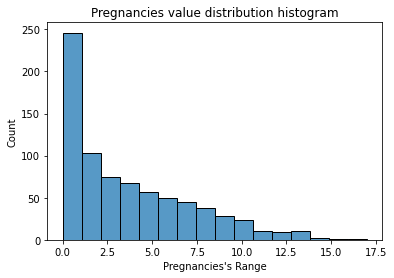

In [126]:
print("pregnant more than 10 times = " + str((df['Pregnancies'] >= 10).sum()))
column_range_without0(df['Pregnancies'])
print("never pregnant = " + str((df['Pregnancies'] == 0).sum()))
plot_column_distribution(df['Pregnancies'])

Number of missing value = 5
Glucose's range = (44, 199)


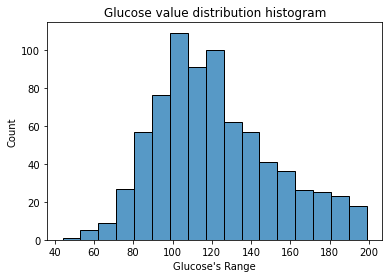

In [127]:
import numpy as np
plot_column_distribution(df['Glucose'])
number_of_0_value(df['Glucose'])
column_range_without0(df['Glucose'])
df['Glucose'] = replace0toNaN(df['Glucose'])

Number of missing value = 35
BloodPressure's range = (24, 122)


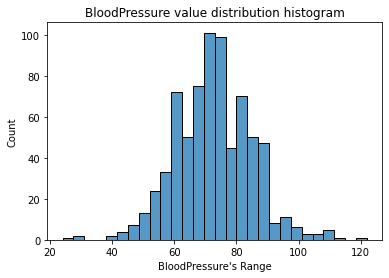

In [128]:
plot_column_distribution(df['BloodPressure'])
number_of_0_value(df['BloodPressure'])
column_range_without0(df['BloodPressure'])
df['BloodPressure'] = replace0toNaN(df['BloodPressure'])

Number of missing value = 227
SkinThickness's range = (7, 99)


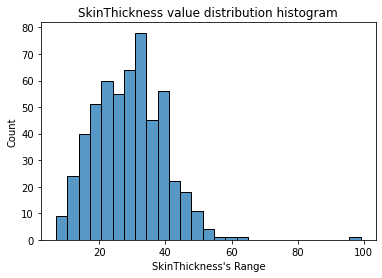

In [129]:
plot_column_distribution(df['SkinThickness'])
number_of_0_value(df['SkinThickness'])
column_range_without0(df['SkinThickness'])
df['SkinThickness'] = replace0toNaN(df['SkinThickness'])

Number of missing value = 374
Insulin's range = (14, 846)


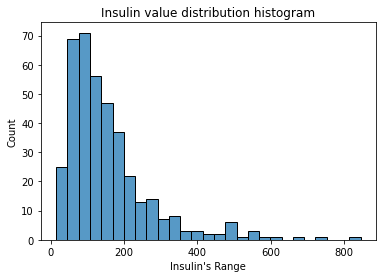

In [130]:
plot_column_distribution(df['Insulin'])
number_of_0_value(df['Insulin'])
column_range_without0(df['Insulin'])

In [131]:
#  the number of type 1 diabetes with 0 value in insulin and outcome = 1
v1 = ((df['Insulin'] == 0) & (df['Outcome'] == 1)).sum()   # results = 138
v2 = (df['Insulin'] == 0).sum()
print(f'v1 = {v1}, v2 = {v2}, missing data = {v2-v1}')

v1 = 138, v2 = 374, missing data = 236


[Text(0.5, 0, 'Real Insulin Value'),
 Text(0.5, 1.0, ' Real Insulin distribution histogram')]

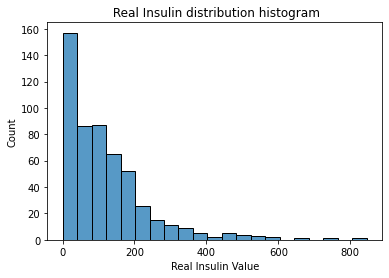

In [132]:
df_RealDataInsulin = df['Insulin'].drop(df.query('Insulin == 0 & Outcome != 1').index)
fig = sns.histplot(df_RealDataInsulin)
fig.set(xlabel = 'Real Insulin Value', title = ' Real Insulin distribution histogram')

In [133]:
# the replace rows
r1 = df['Insulin'][ (df['Insulin'] == 0) & (df['Outcome'] == 0) ].replace(0,np.NaN)
r2 = df['Insulin'].drop(df.query('Insulin == 0 & Outcome != 1').index)
df['Insulin'] = pd.concat([r1,r2])
df['Insulin']

0        0.0
1        NaN
2        0.0
3       94.0
4      168.0
       ...  
763    180.0
764      NaN
765    112.0
766      0.0
767      NaN
Name: Insulin, Length: 768, dtype: float64

Number of missing value = 11
BMI's range = (18.2, 67.1)


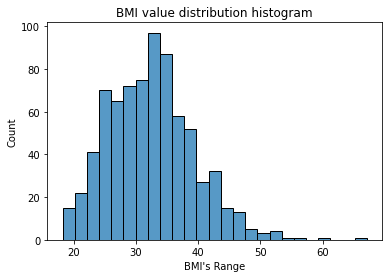

In [134]:
plot_column_distribution(df['BMI'])
number_of_0_value(df['BMI'])
column_range_without0(df['BMI'])
df['BMI'] = replace0toNaN(df['BMI'])

Number of missing value = 0
DiabetesPedigreeFunction's range = (0.078, 2.42)


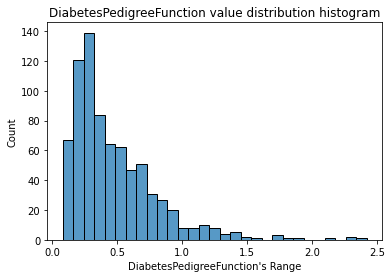

In [135]:
plot_column_distribution(df['DiabetesPedigreeFunction'])
number_of_0_value(df['DiabetesPedigreeFunction'])
column_range_without0(df['DiabetesPedigreeFunction'])

Number of missing value = 0
Age's range = (21, 81)


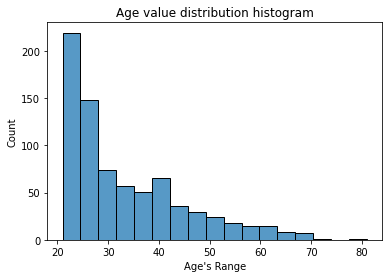

In [136]:
plot_column_distribution(df['Age'])
number_of_0_value(df['Age'])
column_range_without0(df['Age'])

Number of missing value = 500
Outcome's range = (1, 1)


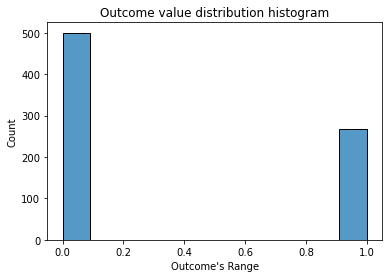

In [137]:
plot_column_distribution(df['Outcome'])
number_of_0_value(df['Outcome'])
column_range_without0(df['Outcome'])

## use KNNImputor to replace the missing value

In [138]:
# look at the replace dataframe first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   532 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [140]:
# export the csv file which replace the missing value to np.nan
from pathlib import Path  
filepath = Path('Export/NaN_diabetes.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 

In [145]:
import numpy as np
from sklearn.impute import KNNImputer

# using default settings, n_neighbors = 5, weights = uniform
knn_imputer = KNNImputer()
imputation_npnd = knn_imputer.fit_transform(df)
imputation_npnd

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [146]:
imputation_npnd.shape

(768, 9)

In [147]:
type(imputation_npnd)

numpy.ndarray

In [148]:
# convert numpy.ndarray to pandas dataframe
imputation_df = pd.DataFrame(imputation_npnd, columns=df.columns)
imputation_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,33.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,127.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,33.2,0.0,30.1,0.349,47.0,1.0


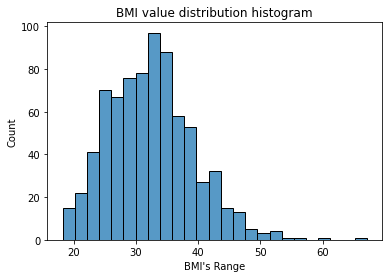

In [181]:
new_columns = [imputation_df['Pregnancies'], imputation_df['Glucose'], imputation_df['BloodPressure'],
imputation_df['SkinThickness'],imputation_df['Insulin'],imputation_df['BMI'],imputation_df['DiabetesPedigreeFunction'],
imputation_df['Age'],imputation_df['Outcome']]
#plot_column_distribution(imputation_df['Pregnancies'])
#plot_column_distribution(imputation_df['Glucose'])
#plot_column_distribution(imputation_df['BloodPressure'])
#plot_column_distribution(imputation_df['SkinThickness'])
#plot_column_distribution(imputation_df['Insulin'])
#plot_column_distribution(imputation_df['BMI'])
#plot_column_distribution(imputation_df['DiabetesPedigreeFunction'])
#plot_column_distribution(imputation_df['Age'])
#plot_column_distribution(imputation_df['Outcome'])

In [163]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

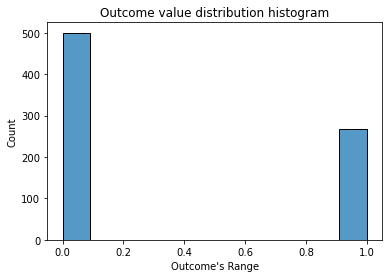

In [160]:

plot_column_distribution(imputation_df['Outcome'])

### plot heatmap, pariplot using plotly

In [166]:
# Heatmap
import plotly.express as px
# change the DiabetesPedigreeFunction to DPF
imputation_df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome']
# corralation
imputation_df_corr = imputation_df.corr()
# use plotly to plot the heatmap
px.imshow(imputation_df_corr,color_continuous_scale='RdBu_r' ,text_auto=True,origin='lower',title="Diabetes Heatmap")

In [171]:
# pair plot
fig = px.scatter_matrix(imputation_df,color='Outcome', title='Diabetes Pair Plot', dimensions=['Pregnancies','Glucose','Insulin','Age','Outcome'],
labels={'Pregnancies' : 'Pg', 'Glucose':'Gc', 'BloodPressure':'BP', 'SkinThickness':'ST', 'Insulin':'Is',
       'Outcome':'OC'})
fig.show()

In [172]:
# pair plot
fig = px.scatter_matrix(imputation_df,color='Outcome', title='Diabetes Pair Plot', dimensions=['BMI','Glucose','Insulin','DPF','SkinThickness'],
labels={'Pregnancies' : 'Pg', 'Glucose':'Gc', 'BloodPressure':'BP', 'SkinThickness':'ST', 'Insulin':'Is',
       'Outcome':'OC'})
fig.show()

In [173]:
imputation_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

In [179]:
# plot the animation, animation_frame = Age
# we need to sort the DataFrame by Age
sortAge_imputation_df = imputation_df.sort_values(by='Age', ascending=True)
fig = px.scatter(sortAge_imputation_df, x="SkinThickness", y="Pregnancies", animation_frame="Age",color='Outcome',size = 'BMI',
title= 'Beauty and Diabetes')
fig.update_layout(yaxis_range=[-2,17])

fig.show()